In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataset = pd.read_excel(r'E:\Jupyter Notebook\Superstore_USA.xlsx')

In [16]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [17]:
dataset.shape

(9426, 24)

 We will first find the missing values in the dataset

In [18]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [19]:
 dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace = True)

In [20]:
dataset['Product Base Margin'].isnull().sum()

0

so now there are no null values remaining....all null values are already filled by mean values

# Order Priority

Now we will classify the Order priority column....into all mentioned categories:

In [21]:
dataset['Order Priority'].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: Order Priority, dtype: int64

now u can see above that 1 critical is disjoint from the other critical values, we need to resolve this:

In [23]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

here u can see that the disjoint critical has got an extra tailing space at end...we will remove that now

In [26]:
dataset['Order Priority'] = dataset['Order Priority'].replace("Critical ", "Critical")

In [27]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

now we have removed that exra critical disjoint value and merged it with critical value

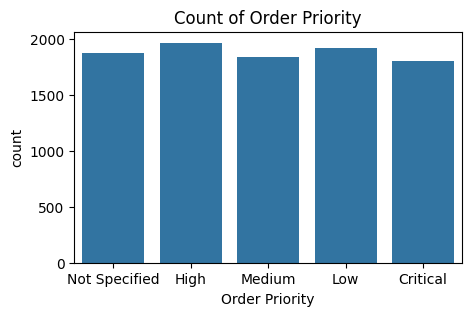

In [33]:
plt.figure(figsize = (5,3))
sns.countplot(x = "Order Priority", data = dataset)
plt.title("Count of Order Priority")
plt.show()

same graph can be plotted with matplotlib as follows:

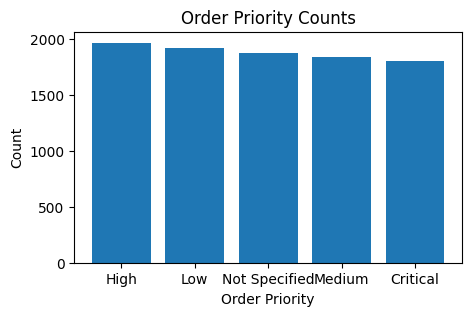

In [30]:
# Count occurrences of each unique value in "Order Priority"
order_priority_counts = dataset["Order Priority"].value_counts()

# Create the bar plot
plt.figure(figsize=(5, 3))
plt.bar(order_priority_counts.index, order_priority_counts.values)

# Add labels and title
plt.xlabel("Order Priority")
plt.ylabel("Count")
plt.title("Order Priority Counts")

# Show the plot
plt.show()


you can save the graph plotted with the line: 
plt.savefig("Count of Order Priority.jpg")

# Ship Mode

In [36]:
dataset['Ship Mode'].value_counts()

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

In [42]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

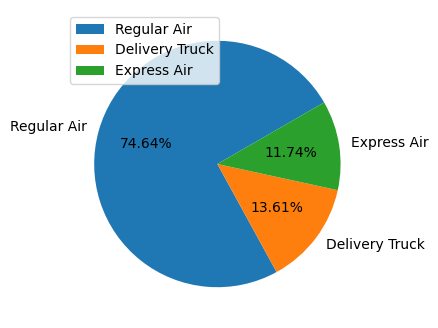

In [55]:
plt.figure(figsize = (5,4))
plt.pie(y, labels = x,startangle= 30,autopct="%0.2f%%") # autopct is used fo giving percentage values to the pie chart
plt.legend(loc = 2)
plt.show()

## Product Category vs Shipping Mode 

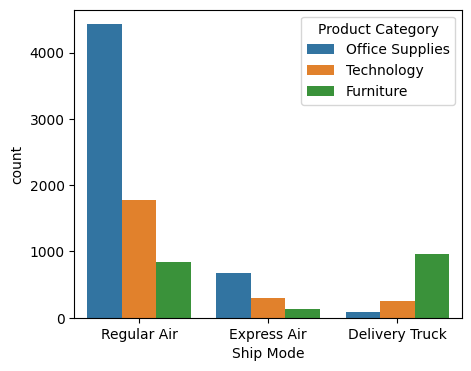

In [59]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Ship Mode", data = dataset, hue = "Product Category")
plt.show()

# Customer Segment

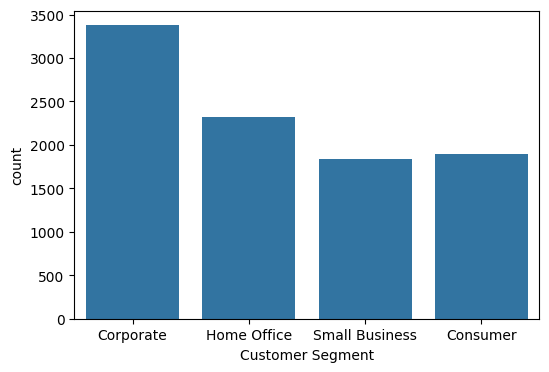

In [61]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Customer Segment", data = dataset)
plt.show()

# Product category

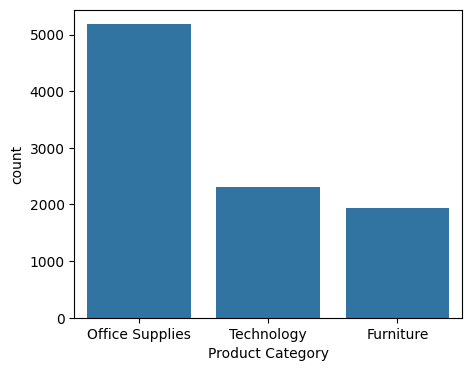

In [63]:
plt.figure(figsize = (5,4))
sns.countplot(x="Product Category", data = dataset)
plt.show()

<Axes: xlabel='Product Category', ylabel='count'>

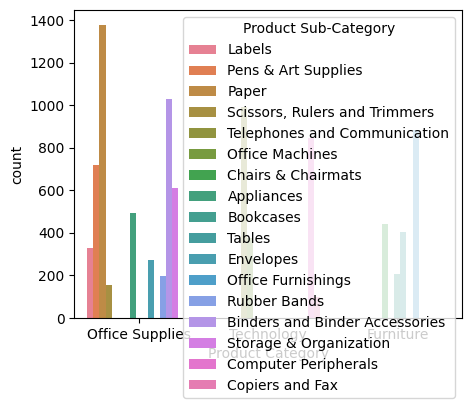

In [66]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Product Category", data = dataset, hue = "Product Sub-Category")

now u can see there are lot of categories here....therfore we should make 3 separate graphs for office supplies, furniture, technology, Product category

In [70]:
category_array

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

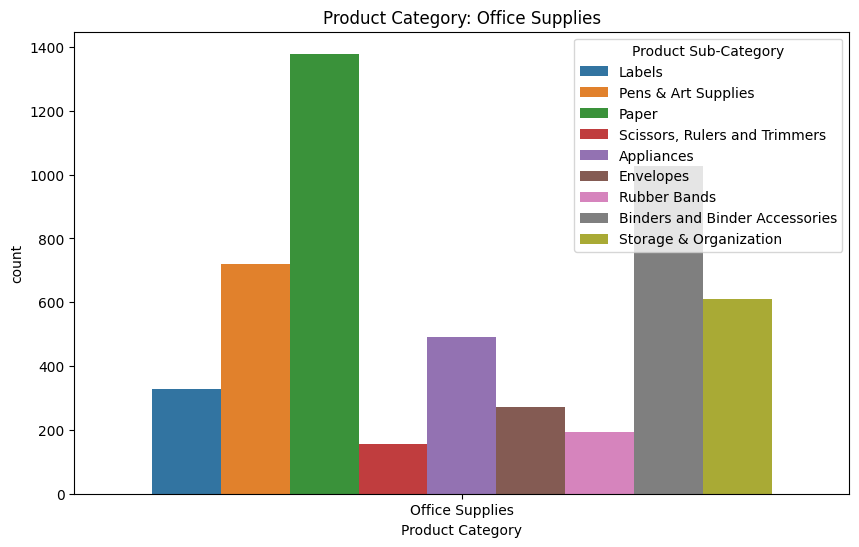

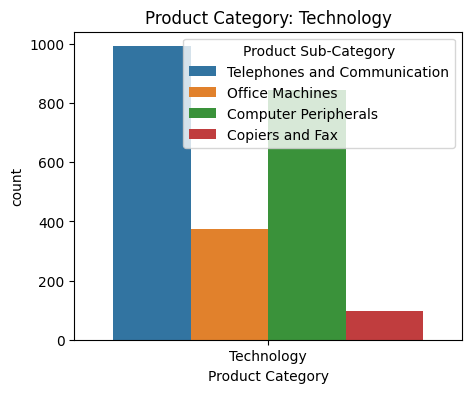

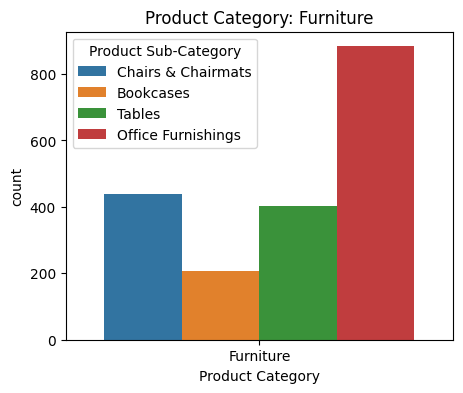

In [86]:
# plt.figure(figsize = (5,4))
# for i in category_array:
#     sns.countplot(x = "Product Category", data = dataset[dataset['Product Category']==i], hue = "Product Sub-Category")
#     plt.show()

for i in category_array:
    # Set figure size based on condition
    if i == category_array[0]:  # We want a different size for the first category only
        plt.figure(figsize=(10, 6))
    else:
        plt.figure(figsize=(5, 4))
    
    # Plot each category individually
    sns.countplot(x="Product Category", data=dataset[dataset['Product Category'] == i], hue="Product Sub-Category")
    plt.title(f"Product Category: {i}")
    plt.show()  # Show each plot separately


## Same can be done by using subplots as follows:

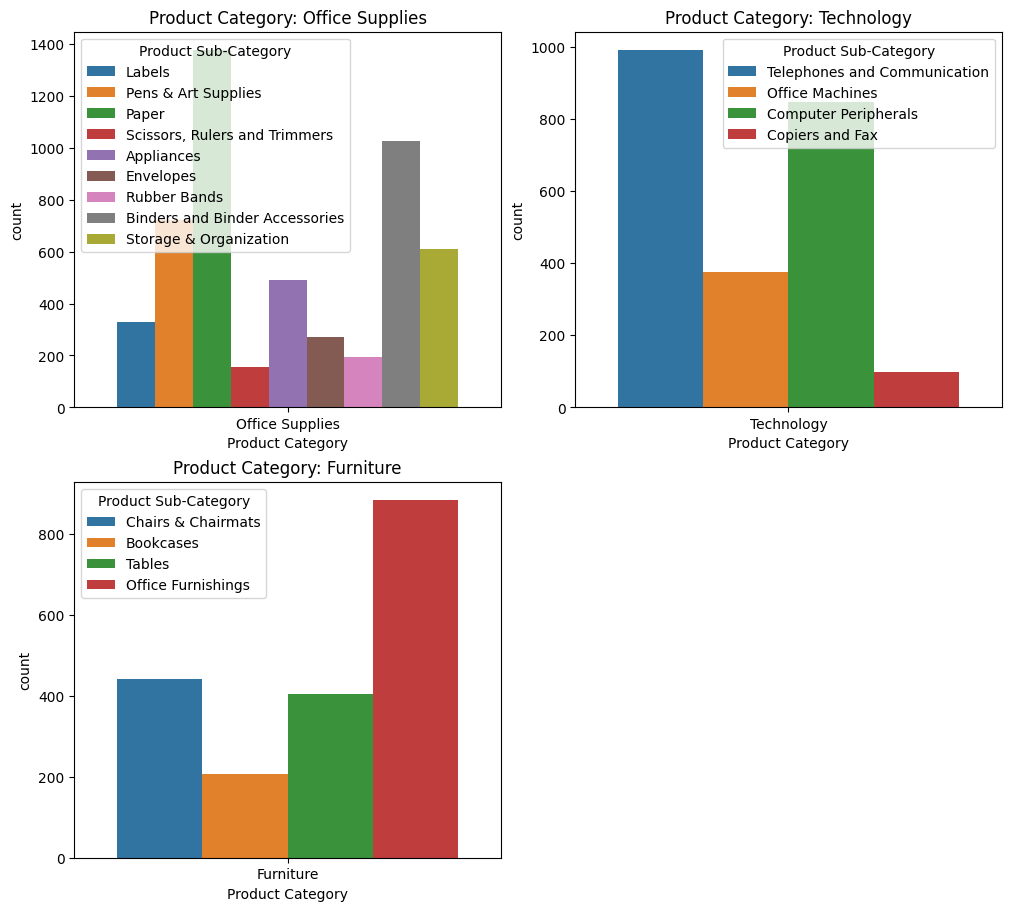

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns based on the number of categories
num_categories = len(category_array)
num_cols = 2  # Define the number of columns (e.g., 2 per row)
num_rows = (num_categories + 1) // num_cols  # Calculate the required number of rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 9), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop over each category and create a count plot in each subplot
for idx, category in enumerate(category_array):
    sns.countplot(
        x="Product Category",
        data=dataset[dataset['Product Category'] == category],
        hue="Product Sub-Category",
        ax=axes[idx]
    )
    axes[idx].set_title(f"Product Category: {category}")

# Hide any empty subplots if num_categories is less than num_rows * num_cols
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

# Show the figure with all subplots
plt.show()


Now Order Date Column:

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [91]:
dataset['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9426 entries, 0 to 9425
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9426 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 73.8 KB


we can see that the Order Date column is alreday in Datetime 

Now we will make an separater column for year

In [92]:
dataset['Order Date'].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Date, Length: 9426, dtype: int64

we need to store all these years in separate column

In [93]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [94]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522,2010


In [97]:
dataset['Order Year'].value_counts()

2013    3054
2012    2241
2011    2179
2010    1952
Name: Order Year, dtype: int64

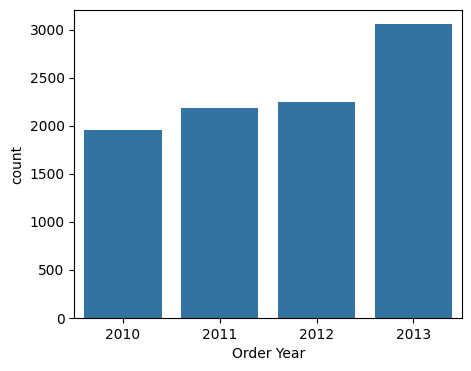

In [99]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Order Year", data = dataset)
plt.show()

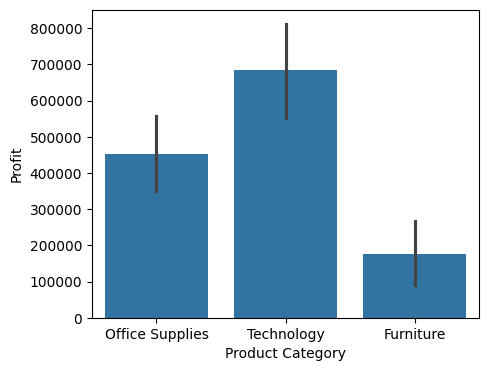

In [101]:
plt.figure(figsize = (5,4))
sns.barplot(x = "Product Category", y = "Profit", data = dataset, estimator = 'sum')
plt.show()

## State column...to find where prdfit is maximum and where is minimum

In [103]:
dataset['State or Province'].value_counts()[:5]
# top 5 states with maximum sales

California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: State or Province, dtype: int64

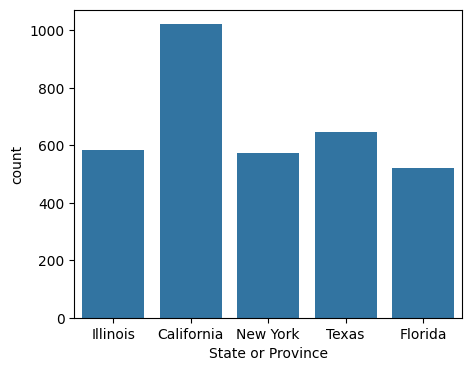

In [105]:
plt.figure(figsize = (5,4))
top5_states = dataset['State or Province'].value_counts().index[:5]
filtered_data = dataset[dataset['State or Province'].isin(top5_states)]
sns.countplot(x="State or Province", data=filtered_data)
plt.show()

Which is having the mosta and lowest profit base margin 

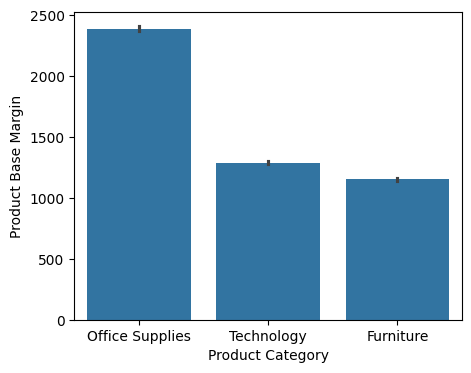

In [107]:
plt.figure(figsize = (5,4))
sns.barplot(x = "Product Category", y = "Product Base Margin", data =dataset, estimator = 'sum')
plt.show()

## Some insights drawn form the above performed data analysis
#### 1. Which category is having the most and lowest profit base margin- Office Supplies(most) and Furniture(lowest)
#### 2. Business is best in California
#### 3. Year by Year our company is growing in number of orders
#### 4. Office supplies has the most orders..but here profit is less and for Technology Product Category orders are less but profit is more.
#### 5. High Profit in Technology Product Category
#### 6. Corporate people has got the most orders
#### 7. Regular Air has got the highest number of shippings